<div style="background:#e5e5e5; color:#000; padding:10px">

Привет еще раз!\
Все замечания устранены, проект принят!
    
Рекомендую почитать статью по выбору метода сегментации,  даже по нашим данным можно попробовать разные методы: https://vaael.ru/ru/article/view?id=1596


</div>

# Поиска инсайтов и точек роста

Исполнитель: Хазанов Михаил

Дата: 28.07.2025




С данными сервиса доставки еды «Всё.из.кафе» вы уже работали в одном из проектов базового курса. Тогда вы описывали ключевые метрики продукта — количество пользователей, заказов и выручку.

Однако конкуренты сервиса не дремлют, и руководство ждёт от продукта роста. Найти инсайты, которые позволят сервису повысить показатель удержания пользователей и улучшить взаимодействие с партнёрами, поручено продуктовому аналитику, то есть вам.

Вам необходимо помочь бизнесу ответить на следующие вопросы:
- Как ведут себя пользователи? Как наиболее эффективно выстроить работу с ними, чтобы они продолжали пользоваться продуктом?
- Какой путь проходят пользователи в сервисе? Где «проваливаются»?
- Как улучшить взаимодействие с партнёрами-ресторанами?

### Задачи 

В рамках данного проекта вы проведёте комплексный анализ данных:
- изучите пользовательский путь и проанализируете конверсии через воронки;
- сегментируете пользователей с помощью RFM-модели для оценки лояльности и поведения клиентов;
- кластеризуете рестораны методом K-Means, чтобы выделить группы с разными моделями работы и разработать персонализированные маркетинговые стратегии.

Такой подход позволит ближе познакомиться с работой сервиса, выявить узкие места и предложить решения для удержания пользователей и повышения эффективности сотрудничества с ресторанами.


### Данные

Данные включают следующие сведения:
      
- `visitor_uuid` — идентификатор посетителя. Это идентификатор, который присваивается системой любому новому пользователю вне зависимости от того, зарегистрировался он в продукте или нет.
- `user_id` — идентификатор зарегистрированного пользователя. Присваивается посетителю после создания учётной записи: ввода логина, пароля, адреса доставки и контактных данных.
- `device_type` — тип платформы, с которой посетитель зашёл в продукт.
- `city_id` — город, из которого посетитель зашёл в сервис.
- `source` — рекламный источник привлечения посетителя.
- `first_date` — дата первого посещения продукта.
- `visit_id` — уникальный идентификатор сессии.
- `event` — название аналитического события.
- `datetime` — дата и время события.
- `rest_id` — уникальный идентификатор ресторана (заполняется для заказов, карточек ресторанов и блюд).
- `object_id` — уникальный идентификатор блюда (заполняется для заказов и карточек блюд).
- `order_id` — уникальный идентификатор заказа.
- `revenue` — выручка от заказа (в рублях). Это та сумма, которую пользователь видит при оплате.
- `delivery` — стоимость доставки (в рублях).
- `commission` — комиссия, которую «Всё.из.кафе» берёт с выручки ресторана, в процентах.

    
### План проекта
- Загрузка данных и их предобработка.
- Анализ пользовательского пути новых пользователей.
- RFM сегментация.
- K-Means кластеризация.
- Итоговый вывод и рекомендации.

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ Хорошо, что есть описание и цели проекта.
</div>

## 1. Загрузка данных и их предобработка

Загрузите данные и получите первую информацию о них. Проведите необходимую предобработку. Основную информацию о данных и этапы предобработки зафиксируйте в кратком промежуточном выводе.

In [1]:
# Используйте ячейки типа Code для вашего кода, 
# а ячейки типа Markdown для комментариев и выводов

In [2]:
# При необходимости добавьте новые ячейки для кода или текстового блока

In [3]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs 

In [4]:
# Создаем датафрейм и смотрим столбцы
df = pd.read_csv('...')
df.head()

,visitor_uuid,user_id,device_type,city_id,source,first_date,visit_id,event,datetime,rest_id,object_id,order_id,revenue,delivery,commission
0,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,authorization,2021-05-01 16:07:53,NaN,NaN,NaN,NaN,NaN,NaN
1,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,reg_page,2021-05-01 16:09:16,NaN,NaN,NaN,NaN,NaN,NaN
2,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,confirm_phone,2021-05-01 16:09:19,NaN,NaN,NaN,NaN,NaN,NaN
3,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,login,2021-05-01 16:09:23,NaN,NaN,NaN,NaN,NaN,NaN
4,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,main_page,2021-05-01 16:09:34,2c6095730b514c189ee41c65f03febc3,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205510 entries, 0 to 205509
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   visitor_uuid  205510 non-null  object 
 1   user_id       205510 non-null  float64
 2   device_type   205510 non-null  object 
 3   city_id       205510 non-null  int64  
 4   source        205510 non-null  object 
 5   first_date    205510 non-null  object 
 6   visit_id      205510 non-null  int64  
 7   event         205510 non-null  object 
 8   datetime      205510 non-null  object 
 9   rest_id       166915 non-null  object 
 10  object_id     21308 non-null   float64
 11  order_id      7008 non-null    float64
 12  revenue       7008 non-null    float64
 13  delivery      7008 non-null    float64
 14  commission    21308 non-null   float64
dtypes: float64(6), int64(2), object(7)
memory usage: 23.5+ MB


In [6]:
# Проверим на дубликаты
df.duplicated().sum()

0

Пропуски в датафрейме есть, однако они в столбцах, относящихся к заказам. Много различных событий, и не для всех заполняются дополнительные атрибуты (например order_id заполняется только для событий заказа и тд). Данных заказов могло и не быть, поэтому пропуски логичны. Дубликатов нет.

In [7]:
df.first_date = pd.to_datetime(df.first_date)
df.datetime = pd.to_datetime(df.datetime)

---

## 2. Анализ пользовательского пути

Маркетологи стали замечать следующее: деньги на рекламу по-прежнему тратятся, а заказов стало меньше. И это несмотря на то, что приложение скачивается и устанавливается так же активно, как раньше. Складывается ощущение, что пользователи где-то теряются. При этом доля заказов с десктопной версии приложения увеличилась по сравнению с мобильной.

Разработчики говорят, что последние обновления мобильной версии приложения не должны были повлиять на каталог блюд или его выбор для заказа и последующей оплаты доставки, так как изменения касались нового алгоритма подтверждения мобильного телефона и адреса доставки.

С помощью воронок изучите общий пользовательский путь новых пользователей, затем сравните поведение пользователей мобильной и десктопной версий приложения. 

**Задача 2.1.** Постройте и визуализируйте общую воронку (по всем данным), затем опишите пользовательский путь: какие этапы представлены, какова их последовательность, на каком (или на каких) этапах теряется большая часть новых пользователей.
    
При решении постройте две воронки: 
- **классическую воронку** — доля от первого шага в процентах
- **step-by-step** — с конверсией от предыдущего этапа.

Предполагается, что пользователь проходит такой путь к оформлению доставки блюда из ресторанов:
1. `authorization` — авторизация пользователя — запуск приложения.
2. `main_page` — загрузка основной страницы приложения.
2. `reg_page` — переход на страницу регистрации.
2. `confirm_phone` — подтверждение телефона (окончание процесса регистрации).
2. `object_page` — страница блюда.
2. `add_to_cart` — переход в корзину.
2. `order` — оформление заказа.    

In [8]:
# Список событий воронки
event_list = ["authorization", "main_page", "reg_page", "confirm_phone", "object_page", "add_to_cart", "order"]
results = []

# Считаем количество пользователей для каждого события
for event_name in event_list:  # Пропускаем первый элемент, так как мы уже добавили его
    # Фильтруем данные по событию
    df_filtered = df[df['event'] == event_name]
    # Считаем уникальных пользователей, которые совершили это событие
    count = df_filtered['visitor_uuid'].nunique()
    results.append((event_name, count))

# Формируем таблицу воронки
funnel = pd.DataFrame(results, columns=['Этап', 'Пользователи'])

# Рассчитываем конверсию от первого шага (классическая воронка)
funnel['Конверсия от первого шага (%)'] = (funnel['Пользователи'] / funnel.iloc[0]['Пользователи']) * 100

# Рассчитываем конверсию step-by-step (от предыдущего этапа)
funnel['Конверсия от предыдущего этапа (%)'] = (funnel['Пользователи'] / funnel['Пользователи'].shift(1)) * 100
funnel.loc[0, 'Конверсия от предыдущего этапа (%)'] = 100  # Первый этап 100%

print("Воронка конверсии:")
print(funnel)
print("\n")

Воронка конверсии:
            Этап  Пользователи  Конверсия от первого шага (%)  \
0  authorization          7796                     100.000000   
1      main_page          6835                      87.673166   
2       reg_page          5649                      72.460236   
3  confirm_phone          4347                      55.759364   
4    object_page          3530                      45.279631   
5    add_to_cart          2929                      37.570549   
6          order          2432                      31.195485   

   Конверсия от предыдущего этапа (%)  
0                          100.000000  
1                           87.673166  
2                           82.648135  
3                           76.951673  
4                           81.205429  
5                           82.974504  
6                           83.031751  




<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента</b>
    
  Поправил и выше, и ниже, до этого делал везде user_id
</div>
<div class="alert alert-success">
  
  <b>Комментарий ревьюера v.2</b>
    
  ✔️  👌
</div>

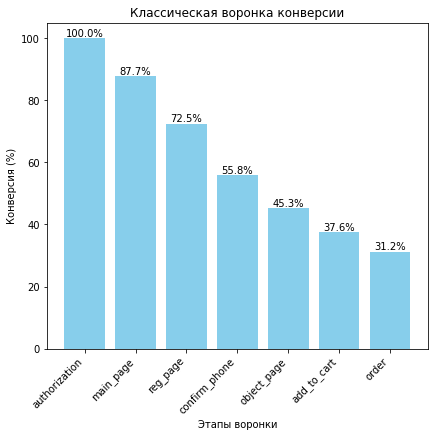

In [9]:
# Визуализация воронки
plt.figure(figsize=(15, 6))

# Классическая воронка
plt.subplot(1, 2, 1)
bars1 = plt.bar(range(len(funnel)), funnel['Конверсия от первого шага (%)'], color='skyblue')
plt.xlabel('Этапы воронки')
plt.ylabel('Конверсия (%)')
plt.title('Классическая воронка конверсии')
plt.xticks(range(len(funnel)), funnel['Этап'], rotation=45, ha='right')

# Добавляем значения на столбцы
for i, bar in enumerate(bars1):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom')


Самые большие падения на этапах от авторизации к загрузке основной страницы приложения - 12.3%, потом на этапах перехода к регистрации - 15.2% и к окончанию регистрации - 16.7%. В дальнейших этапах потери менее 10%. Возможно, проблемы на начальных этапах и это связано с обновлениями страниц и стадией регистрации.

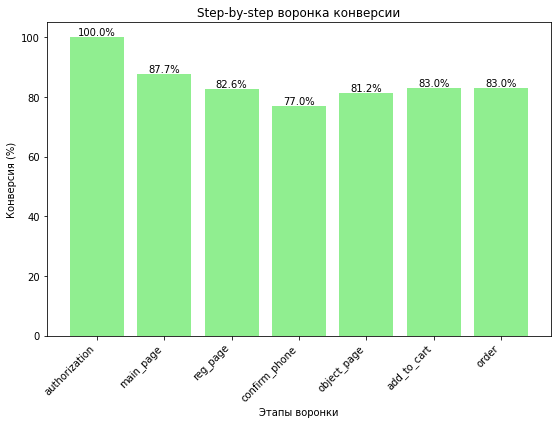

In [10]:
plt.figure(figsize=(15, 6))
# Step-by-step воронка
plt.subplot(1, 2, 2)
bars2 = plt.bar(range(len(funnel)), funnel['Конверсия от предыдущего этапа (%)'], color='lightgreen')
plt.xlabel('Этапы воронки')
plt.ylabel('Конверсия (%)')
plt.title('Step-by-step воронка конверсии')
plt.xticks(range(len(funnel)), funnel['Этап'], rotation=45, ha='right')

# Добавляем значения на столбцы
for i, bar in enumerate(bars2):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


В воронке step-by-step конверсия от этапа к этапу примерно одинаковая и составляет 77-87%, нет выделяющихся этапов.

**Задача 2.2.** Сравните пользовательский путь в двух приложениях: в мобильной версии и десктопной. Для этого постройте и визуализируйте **две воронки step-by-step**: для новых пользователей **мобильной** и **десктопной** версий приложения.
    
Сравните результаты между собой и проанализируйте, есть ли различия в пользовательском пути для различных приложений. Результаты сравнения опишите в небольшом **промежуточном выводе**.

In [11]:
# Фильтруем данные по типам устройств
df_mobile = df[df['device_type'] == 'Mobile']
df_desktop = df[df['device_type'] == 'Desktop']

print(f"Мобильных пользователей: {df_mobile['visitor_uuid'].nunique():,}")
print(f"Десктопных пользователей: {df_desktop['visitor_uuid'].nunique():,}")


Мобильных пользователей: 3,236
Десктопных пользователей: 5,655


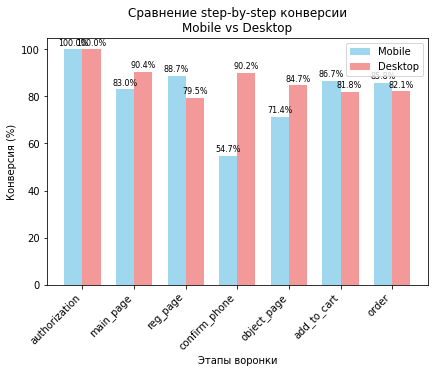

In [12]:
# Функция для построения воронки
def build_funnel(df_data, device_type):
    """Строит воронку для заданного типа устройства"""
    event_list = ["authorization", "main_page", "reg_page", "confirm_phone", "object_page", "add_to_cart", "order"]
    
    results = []
    
    # Считаем количество пользователей для каждого события
    for event_name in event_list:
        count = df_data[df_data['event'] == event_name]['visitor_uuid'].nunique()
        results.append((event_name, count))
    
    # Создаем DataFrame воронки
    funnel = pd.DataFrame(results, columns=['Этап', 'Пользователи'])
    
    # Рассчитываем конверсию step-by-step
    funnel['Конверсия от предыдущего этапа (%)'] = (funnel['Пользователи'] / funnel['Пользователи'].shift(1)) * 100
    funnel.loc[0, 'Конверсия от предыдущего этапа (%)'] = 100  # Первый этап 100%
    
    # Добавляем тип устройства
    funnel['device_type'] = device_type
    
    return funnel

# Строим воронки для каждого типа устройства
funnel_mobile = build_funnel(df_mobile, 'Mobile')
funnel_desktop = build_funnel(df_desktop, 'Desktop')

# Визуализация сравнения воронок
plt.figure(figsize=(15, 10))

# График 1: Сравнение конверсии step-by-step
plt.subplot(2, 2, 1)
x_pos = range(len(event_list))
width = 0.35

mobile_conv = funnel_mobile['Конверсия от предыдущего этапа (%)'].fillna(0)
desktop_conv = funnel_desktop['Конверсия от предыдущего этапа (%)'].fillna(0)

bars1 = plt.bar([x - width/2 for x in x_pos], mobile_conv, width, 
                label='Mobile', color='skyblue', alpha=0.8)
bars2 = plt.bar([x + width/2 for x in x_pos], desktop_conv, width, 
                label='Desktop', color='lightcoral', alpha=0.8)

plt.xlabel('Этапы воронки')
plt.ylabel('Конверсия (%)')
plt.title('Сравнение step-by-step конверсии\nMobile vs Desktop')
plt.xticks(x_pos, event_list, rotation=45, ha='right')
plt.legend()

# Добавляем значения на столбцы
for i, (bar, value) in enumerate(zip(bars1, mobile_conv)):
    if value > 0:
        plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 1,
                 f'{value:.1f}%', ha='center', va='bottom', fontsize=8)

for i, (bar, value) in enumerate(zip(bars2, desktop_conv)):
    if value > 0:
        plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 1,
                 f'{value:.1f}%', ha='center', va='bottom', fontsize=8)

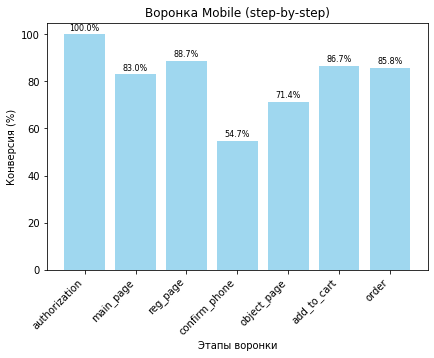

In [13]:
plt.figure(figsize=(15, 10))
# График 3: Отдельная воронка для Mobile
plt.subplot(2, 2, 3)
mobile_conv_clean = mobile_conv[mobile_conv > 0] if len(mobile_conv[mobile_conv > 0]) > 0 else mobile_conv
mobile_stages = [event_list[i] for i in range(len(mobile_conv)) if mobile_conv.iloc[i] > 0 or i == 0] if len(mobile_conv[mobile_conv > 0]) > 0 else event_list

bars5 = plt.bar(range(len(mobile_conv)), mobile_conv, color='skyblue', alpha=0.8)
plt.xlabel('Этапы воронки')
plt.ylabel('Конверсия (%)')
plt.title('Воронка Mobile (step-by-step)')
plt.xticks(range(len(event_list)), event_list, rotation=45, ha='right')

# Добавляем значения
for i, (bar, value) in enumerate(zip(bars5, mobile_conv)):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 1,
             f'{value:.1f}%', ha='center', va='bottom', fontsize=8)

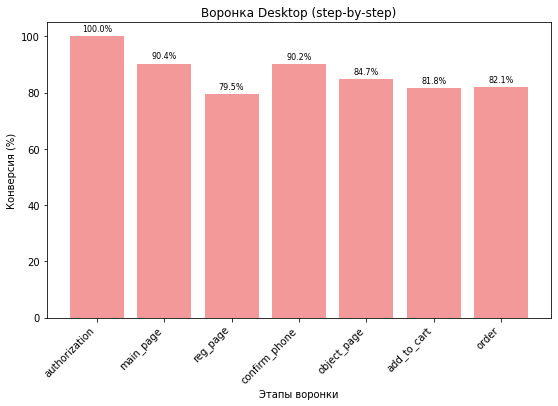

In [14]:
plt.figure(figsize=(15, 10))
# График 4: Отдельная воронка для Desktop
plt.subplot(2, 2, 4)
desktop_conv_clean = desktop_conv[desktop_conv > 0] if len(desktop_conv[desktop_conv > 0]) > 0 else desktop_conv
desktop_stages = [event_list[i] for i in range(len(desktop_conv)) if desktop_conv.iloc[i] > 0 or i == 0] if len(desktop_conv[desktop_conv > 0]) > 0 else event_list

bars6 = plt.bar(range(len(desktop_conv)), desktop_conv, color='lightcoral', alpha=0.8)
plt.xlabel('Этапы воронки')
plt.ylabel('Конверсия (%)')
plt.title('Воронка Desktop (step-by-step)')
plt.xticks(range(len(event_list)), event_list, rotation=45, ha='right')

# Добавляем значения
for i, (bar, value) in enumerate(zip(bars6, desktop_conv)):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 1,
             f'{value:.1f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

В мобильной версии самое крупное падение случилось на этапе подтверждения телефона (55%) и просмотра страницы блюда (72%), в десктопной версии конверсия step-by-step Равномерная (79-91% между этапами). Явно есть проблема именно в мобильном приложении, в компании стоит на это обратить пристальное внимание.

---

## 3. RFM сегментация

У сервиса доставки еды не такое высокое удержание пользователей: в первый день возвращается около 14% посетителей, а на седьмой день и того меньше — около 4–5%. Маркетологи хотят запустить несколько рекламных кампаний, направленных на удержание платящих пользователей и их возврат в сервис, если они давно не совершали заказы.

Для этого необходимо сегментировать пользователей на различные поведенческие сегменты с помощью RFM-сегментации по трём показателям: 
- **давность** (Recency), 
- **частота покупок** (Frequency), 
- **сумма трат** (Monetary).

В качестве даты анализа установите **03 июля 2021 года**.

**Задача 3.1.** Для каждого покупателя посчитайте:
- количество дней с последней покупки — давность (R);
- частоту покупок (F);
- стоимость всех покупок — сумму трат (M).
    
В качестве даты анализа установите **03 июля 2021 года**. После этого постройте три гистограммы и проанализируйте их.

In [15]:
# Фильтруем только заказы (события типа 'order')
df_orders = df[df['event'] == 'order'].copy()
# Рассчитываем количество дней с покупки до анализа:
df_orders['order_recency'] = pd.to_datetime('2021-07-03') - df_orders['datetime']

# Группируем данные для каждого пользователя и рассчитываем данные для RFM-анализа:
df_rfm = df_orders.groupby('user_id').agg(
    # Количество дней с последнего заказа:    
    recency = ('order_recency', lambda x: x.min().days),
    # Количество заказов за период времени: 
    frequency = ('datetime', 'count'),
    # Сумма стоимости всех заказов: 
    monetary_value = ('revenue', 'sum')
).reset_index()

# Проверяем результаты:
print(df_rfm.head(5))

   user_id  recency  frequency  monetary_value
0   5506.0       32          2         3752.00
1   6291.0       57          1         1750.00
2   6820.0       41          1         1260.14
3  11062.0       57          1         3785.60
4  13254.0       54          1          553.00


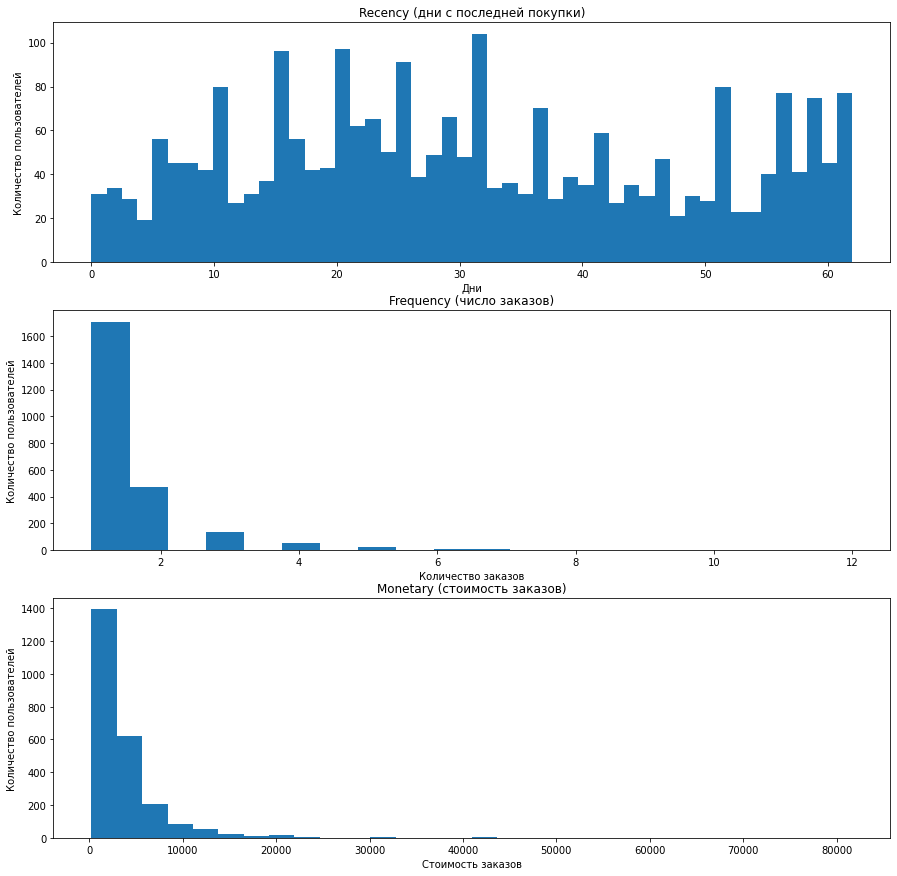

In [16]:


# Постройте три гистограммы

fig, axes = plt.subplots(3, 1, figsize=(15, 15))

# Давность
axes[0].hist(df_rfm['recency'], bins=50)
axes[0].set_title('Recency (дни с последней покупки)')
axes[0].set_xlabel('Дни')
axes[0].set_ylabel('Количество пользователей')

# Частота
axes[1].hist(df_rfm['frequency'], bins=20)
axes[1].set_title('Frequency (число заказов)')
axes[1].set_xlabel('Количество заказов')
axes[1].set_ylabel('Количество пользователей')

# Сумма всех заказов
axes[2].hist(df_rfm['monetary_value'], bins=30)
axes[2].set_title('Monetary (стоимость заказов)')
axes[2].set_xlabel('Стоимость заказов')
axes[2].set_ylabel('Количество пользователей')

plt.show()

С давностью наблюдается относительно равномерный график, где нельзя выделить зависимость количества дней от количества пользователей. По количеству заказов преобладают 0 (за явным преимуществом), потом 1 и 2 заказа. 3-6 заказов и более представлены в очень малом количестве. По стоимости заказы преобладают в сумме 2000-4000, дальше идет существенное падение. 20000-30000 приносят единицы пользователей.

**Задача 3.2.** Выделите **RFM-сегменты** и изучите распределение пользователей по ним.
    
Примените следующие подходы к выделению RFM сегментов:
- **Recency** — разделите на три равные группы.
- **Frequency** —  разделите на три группы: 
    - пользователи с 1 заказом (F-сегмент с небольшим количеством заказов);
    - пользователи с 2 заказами (F-сегмент со средним количеством заказов);
    - пользователи с 3 и более заказами (F-сегмент с большим количеством заказов).
- **Monetary** — разделите на три группы по 33-му и 66-му перцентилям.
    
После этого посчитайте количество покупателей в каждом сегменте, сделайте промежуточные выводы и напишите рекомендации.

In [17]:

# Определяем группу пользователя по количеству дней с момента последнего заказа: 
df_rfm['r'] = pd.cut(df_rfm['recency'], bins=3, labels=[3,2,1])

# Определяем группу пользователя по количеству заказов: 
df_rfm['f'] = pd.cut(df_rfm['frequency'], [0, 1, 2, float('inf')], labels=[1,2,3], include_lowest=True)

# Определяем группу пользователя по сумме стоимости заказов: 
q33 = df_rfm['monetary_value'].quantile(0.33)
q66 = df_rfm['monetary_value'].quantile(0.66)
df_rfm['m'] = pd.cut(df_rfm['monetary_value'], [-1, q33, q66, float('inf')], labels=[1,2,3], include_lowest=True)

# Находим групповой RFM-индекс:
df_rfm[['r','f','m']] = df_rfm[['r','f','m']].astype('str')
df_rfm['rfm_group'] = df_rfm['r'] + df_rfm['f'] + df_rfm['m']

# Выводим первые строки таблицы:
print(df_rfm.head(5))

   user_id  recency  frequency  monetary_value  r  f  m rfm_group
0   5506.0       32          2         3752.00  2  2  3       223
1   6291.0       57          1         1750.00  1  1  1       111
2   6820.0       41          1         1260.14  2  1  1       211
3  11062.0       57          1         3785.60  1  1  3       113
4  13254.0       54          1          553.00  1  1  1       111


In [18]:
# Группируем данные по сегментам и считаем их размер:
rfm_group = df_rfm.groupby('rfm_group').agg({'user_id':'nunique'}).reset_index()

# Считаем долю пользователей в каждом сегменте:
rfm_group['user_share'] = rfm_group['user_id'] / rfm_group['user_id'].sum()

# Выводим результат:
print(rfm_group.sort_values(by='user_id', ascending=False))

   rfm_group  user_id  user_share
8        211      280    0.115894
0        111      244    0.100993
16       311      244    0.100993
9        212      234    0.096854
1        112      210    0.086921
17       312      185    0.076573
10       213      126    0.052152
13       223      119    0.049255
15       233      105    0.043460
18       313      102    0.042219
21       323       91    0.037666
5        123       85    0.035182
2        113       84    0.034768
23       333       68    0.028146
12       222       55    0.022765
20       322       46    0.019040
4        122       45    0.018626
7        133       42    0.017384
3        121       16    0.006623
11       221        8    0.003311
19       321        8    0.003311
14       232        7    0.002897
6        132        7    0.002897
22       332        5    0.002070


Если по давности наблюдается относительная равномерность, то по частоте покупок и сумме трат преобладает цифра "1", то есть у нас 32% пользователей (первые три строки: 211 + 111 + 311) совершают меньше всего покупок и приносят меньше всего денег. Следующие 3 строки (212 + 112 + 312) делают также мало покупок, но приносят среднюю сумму дохода (данные между 33 и 66 процентилями). Таких клиентов около 25%. Оставшиеся сегменты составляют 5% и менее.

---

## 4. K-Means кластеризация

Чтобы лучше понимать поведение ресторанов и предлагать им персонализированные условия сотрудничества, а также создавать персонализированные предложения для пользователей, маркетологи запросили кластеризацию ресторанов по следующим параметрам:
- общее количество заказов;
- средняя стоимость заказа;
- общее число заказанных уникальных блюд (ассортимент ресторана).

С помощью метода K-Means разделите рестораны на кластеры, отражающие различные модели работы и целевые сегменты. Это позволяет выделить группы ресторанов с похожими характеристиками и разрабатывать для них эффективные маркетинговые стратегии.

**Задача 4.1.** Подготовьте данные для кластеризации и для каждого ресторана подсчитайте:
- общее количество заказов;
- средняя стоимость заказа;
- общее число заказанных уникальных блюд (ассортимент ресторана).

In [19]:
# Посчитаем число уникальных ресторанов
print(f"Уникальных ресторанов: {df['rest_id'].nunique():,}")

Уникальных ресторанов: 21


In [20]:
# Фильтруем только заказы (события типа 'order')
df_orders = df[df['event'] == 'order'].copy()

# 1. Общее количество заказов для каждого ресторана
total_orders = df_orders.groupby('rest_id')['order_id'].count().reset_index()
total_orders.rename(columns={'order_id': 'total_orders'}, inplace=True)

# 2. Средняя стоимость заказа для каждого ресторана
average_order_value = df_orders.groupby('rest_id')['revenue'].mean().reset_index()
average_order_value.rename(columns={'revenue': 'average_order_value'}, inplace=True)

# 3. Уникальные блюда для каждого ресторана
unique_dishes = df_orders.groupby('rest_id')['object_id'].nunique().reset_index()
unique_dishes.rename(columns={'object_id': 'unique_dishes'}, inplace=True)

# Объединение всех результатов в один DataFrame
restaurant_features = pd.merge(total_orders, average_order_value, on='rest_id')
restaurant_features = pd.merge(restaurant_features, unique_dishes, on='rest_id')

# Вывод результатов для всех 21 ресторанов
restaurant_features.head(21)


,rest_id,total_orders,average_order_value,unique_dishes
0,1be5a933aab34fbab594bebba48e976e,144,2260.180222,28
1,1d6bb74687104fa1953924c9684fe624,108,2959.256481,19
2,2c6095730b514c189ee41c65f03febc3,8,1673.000000,4
3,3247a3b5f9494812a3c1a73c5b61f004,33,2777.209697,4
4,39b7eab4f4704ed2886fafe171489960,33,2011.269697,5
5,43e40bacafe8409bb5592877a42d737e,43,3313.064186,6
6,4a693ca500b44ba499f92a724aec5f17,107,2989.588785,12
7,4b9cde3378c447ed81c2c6d4854d4f7e,7,2544.000000,5
8,55d4027ac83e438f9f893892f6903409,1001,2674.652364,75
9,55d6470712ee48e98509478ad6aa18ee,5,4754.400000,2


<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ Тут верно отфильтровали только покупки.
    
</div>

**Задача 4.2.** Нормализуйте данные и найдите оптимальное количество кластеров, использовав метод `.inertia_`. Постройте график зависимости инерции от числа кластеров (метод «локтя») и предположите оптимальное количество кластеров.

In [21]:
# Нормализация данных методом StandardScaler
scaler = StandardScaler()

# Выбираем признаки для нормализации
features_to_scale = ['total_orders', 'average_order_value', 'unique_dishes']
X_scaled = scaler.fit_transform(restaurant_features[features_to_scale])

# Создаем DataFrame с нормализованными данными
restaurant_features_scaled = pd.DataFrame(X_scaled, columns=features_to_scale)
restaurant_features_scaled['rest_id'] = restaurant_features['rest_id'].values

print("\nНормализованные данные:")
print(restaurant_features_scaled.head())


Нормализованные данные:
   total_orders  average_order_value  unique_dishes  \
0     -0.081107            -0.338482       0.549753   
1     -0.197902             0.457123       0.160602   
2     -0.522332            -1.006741      -0.487983   
3     -0.441225             0.249939      -0.487983   
4     -0.441225            -0.621763      -0.444744   

                            rest_id  
0  1be5a933aab34fbab594bebba48e976e  
1  1d6bb74687104fa1953924c9684fe624  
2  2c6095730b514c189ee41c65f03febc3  
3  3247a3b5f9494812a3c1a73c5b61f004  
4  39b7eab4f4704ed2886fafe171489960  


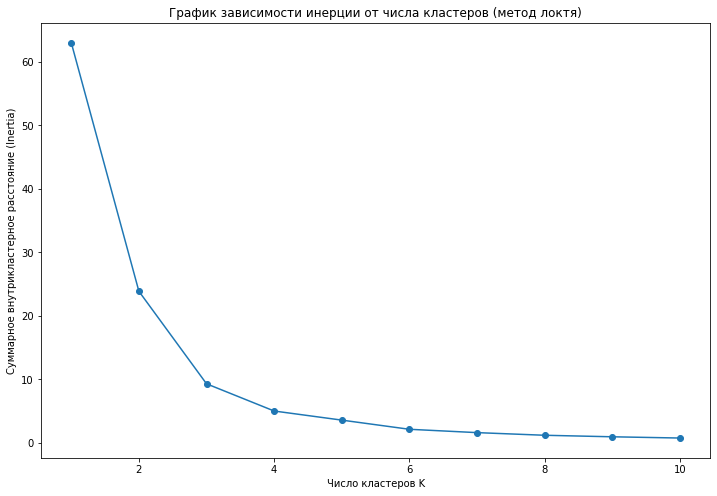

In [22]:
# Создаём массив, в котором будем хранить значения inertia для разбиения с разным числом кластеров
i = []

# Задаём диапазон количества кластеров
min_k = 1
max_k = 10

plt.figure(figsize=(12, 8))

# Перебираем разное количество кластеров
for k in range(min_k, max_k + 1):
   km = KMeans(n_clusters=k, random_state=42)  # Создаём модель KMeans для текущего значения k
   km.fit_transform(X_scaled)  # Обучаем модель и получаем координаты точек в пространстве кластеров
   i.append(km.inertia_)  # Сохраняем значение инерции для текущего k

# Строим график зависимости инерции от количества кластеров
plt.plot(range(min_k, max_k + 1), i, marker='o')
plt.xlabel('Число кластеров K')  # Подпись оси X
plt.ylabel('Суммарное внутрикластерное расстояние (Inertia)')  # Подпись оси Y
plt.title('График зависимости инерции от числа кластеров (метод локтя)')  # Заголовок
plt.show()

Точка, в которой линия графика как бы «складывается», и называется локтем — она соответствует оптимальному количеству кластеров. В нашем случае это значение равно 4, после идет снижение.

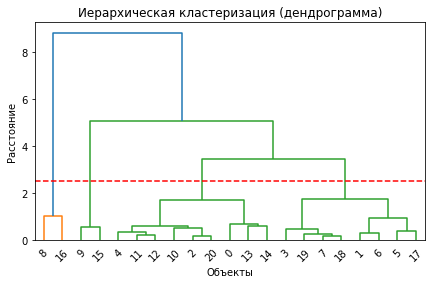

In [23]:
# Код ревьюера:
# Создадим таблицу связей:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X_scaled, method = 'ward')

# Визуализируем таблицу связей:
plt.figure(figsize=(7, 4))  
dendrogram(linked, orientation='top')
 
plt.axhline(y=2.5, color='r', linestyle='--')  
plt.title("Иерархическая кластеризация (дендрограмма)")
plt.xlabel("Объекты")
plt.ylabel("Расстояние")

plt.show()

<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента</b>
  Классная штука! Но вижу первый раз)
</div>

**Задача 4.3.** Проведите кластеризацию, проанализируйте полученные результаты и рассчитайте средние значения по каждому кластеру.
    
После этого визуализируйте результаты, чтобы проследить зависимость признаков друг от друга. Постройте две визуализации, на которые нанесите все кластеры:
- средний чек в зависимости от количества заказов;
- количество блюд в зависимости от количества заказов.

После этого опишите каждый кластер в промежуточном выводе. 

In [24]:
# Определяем количество кластеров
kmeans = KMeans(n_clusters=4, random_state=1)
labels = kmeans.fit_predict(X_scaled)

# Сортируем кластеры по возрастанию «Продолжительности» (второй столбец, индекс 1)
sorted_indices = np.argsort(kmeans.cluster_centers_[:, 1])
sorted_centroids = kmeans.cluster_centers_[sorted_indices]

# Преобразуем нормализованные центроиды обратно в исходные значения
centroids_original_scale = scaler.inverse_transform(sorted_centroids)

# Создаём DataFrame из центроидов
centroids_df = pd.DataFrame(
   centroids_original_scale,
   columns=['Заказы', 'Выручка', 'Блюда'],
   index=[f'Кластер {i}' for i in range(kmeans.n_clusters)]
)

# Форматируем числа для вывода 
pd.options.display.float_format = '{:.0f}'.format


# Выводим данные
print(centroids_df.head())

           Заказы  Выручка  Блюда
Кластер 0      72     1932      9
Кластер 1    1100     2499     83
Кластер 2      65     3025      9
Кластер 3      84     4658      2


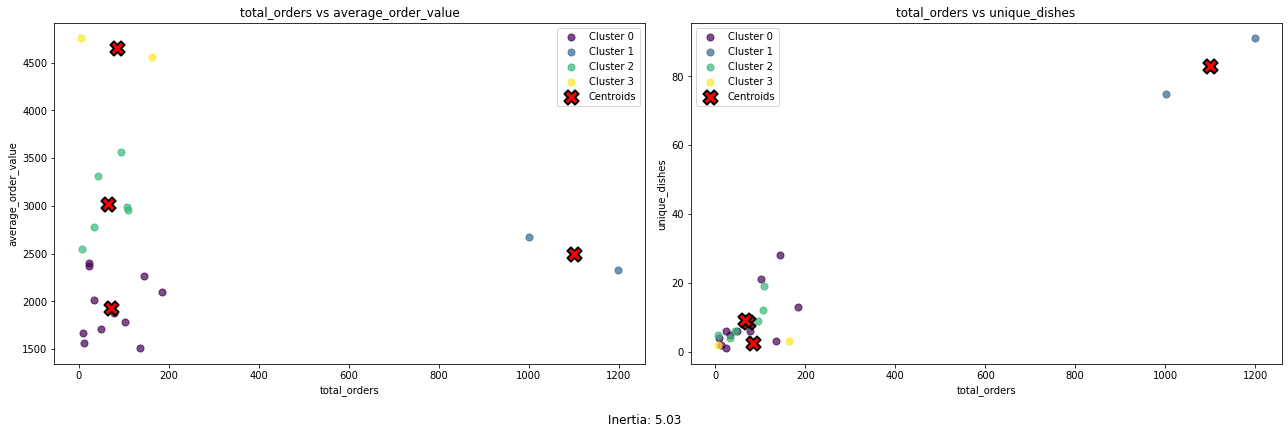

In [25]:


fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Используем исходные данные для графиков
restaurant_features_plot = restaurant_features.copy()
restaurant_features_plot['cluster'] = labels

# Переиндексируем метки кластеров в соответствии с сортировкой
label_mapping = {old_idx: new_idx for new_idx, old_idx in enumerate(sorted_indices)}
restaurant_features_plot['cluster_sorted'] = restaurant_features_plot['cluster'].map(label_mapping)

# Список названий признаков, которые будут использоваться на графиках
axs = ["total_orders", "average_order_value", "unique_dishes"]

# Создаем цветовую карту для кластеров
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_indices)))

# Перебираем пары признаков: (total_orders vs average_order_value), (total_orders vs unique_dishes)
for i, (x_idx, y_idx) in enumerate([[0, 1], [0, 2]]):
   x_label, y_label = axs[x_idx], axs[y_idx]  # Названия признаков для осей

   # Создаем scatter plot для каждого кластера отдельно, чтобы иметь легенду
   for cluster_id in sorted(restaurant_features_plot['cluster_sorted'].unique()):
       cluster_data = restaurant_features_plot[restaurant_features_plot['cluster_sorted'] == cluster_id]
       axes[i].scatter(
           cluster_data[x_label],  # Значения по оси X
           cluster_data[y_label],  # Значения по оси Y
           c=[colors[cluster_id]],  # Цвет для текущего кластера
           s=50,  # Размер точек
           label=f'Cluster {cluster_id}',  # Метка для легенды
           alpha=0.7
       )

   # Строим центроиды кластеров красными крестами
   centroid_scatter = axes[i].scatter(
       centroids_original_scale[:, x_idx],  # X-координаты центров
       centroids_original_scale[:, y_idx],  # Y-координаты центров
       s=200,  # Размер крестов
       c='red',  # Цвет — красный
       edgecolors='black',  # Обводка — чёрная
       linewidths=2,  # Толщина обводки
       marker='X',  # Форма маркера — крест
       label='Centroids'  # Метка для центроидов
   )

   # Подписи осей и заголовок графика
   axes[i].set_xlabel(x_label)
   axes[i].set_ylabel(y_label)
   axes[i].set_title(f'{x_label} vs {y_label}')
   
   # Добавляем легенду
   axes[i].legend()

# Подгоняем макет, оставляя место снизу для подписи с инерцией
plt.tight_layout(rect=[0, 0.05, 1, 1])

# Добавляем текст с СВР внизу графика (по центру)
fig.text(0.5, 0.01, f'Inertia: {kmeans.inertia_:.2f}', ha='center', fontsize=12)

# Показываем итоговый набор визуализаций
plt.show()

Как видно по таблице — у нас сильно выделяется один кластер (кластер 1) по общему количеству заказов и общему числу уникальных блюд, при этом средний чек у них ниже других кластеров. 
По зависимости заказов от среднего чека - кластер 3 (желтый) заказывает мало, но имеет высокий средний чек. Кластер 1 (синий) заказывает много, но имеет средний чек на уровне 2500.
По зависимости заказов и общего числа блюд выделяется именно один кластер (кластер 1), это соответствует таблице выше. 
Кластер 0 (фиолетовый) и заказывает мало, и чек низкий, и блюд мало.
Кластер 2 (бирюзовый) заказывает мало, но средний чек выше кластера 0, при этом блюд также мало.

---

## 5. Итоговый вывод и рекомендации

Сформулируйте общий вывод. Зафиксируйте основные результаты и инсайты, которые, на ваш взгляд, помогут бизнесу улучшить продукт.

Выводы должны быть краткими и ёмкими, ведь их будут читать ваш заказчик, продуктовый менеджер и продуктовая команда.

Самые большие падения на этапах от авторизации к загрузке основной страницы приложения - 12.3%, потом на этапах перехода к регистрации - 15.2% и к окончанию регистрации - 16.7%. В дальнейших этапах потери менее 10%. Возможно, проблемы на начальных этапах и это связано с обновлениями страниц и стадией регистрации. Если смотреть в разбивке - в мобильной версии самое крупное падение случилось на этапе подтверждения телефона (55%) и просмотра страницы блюда (72%), в десктопной версии конверсия step-by-step Равномерная (79-91% между этапами). Явно есть проблема именно в мобильном приложении, в компании стоит на это обратить пристальное внимание разработчиков, здесь происходят очень существенные потери.

По возврату клиентов действительно видим равномерно невысокий возврат к повторным покупкам, поэтому стоит обратить внимание маркетологов на дополнительные акции и скидки и предложения. Если по давности наблюдается относительная равномерность, то по частоте покупок и сумме трат преобладает цифра "1", то есть у нас 32% пользователей (первые три строки: 211 + 111 + 311) совершают меньше всего покупок и приносят меньше всего денег. Следующие 3 строки (212 + 112 + 312) делают также мало покупок, но приносят среднюю сумму дохода. Таких клиентов около 25%. Оставшиеся сегменты составляют 5% и менее.

При выделении по кластерам из 21 ресторана очень выделяются 2 - у них 1000-1200 заказов и 75-90 уникальных блюд. Это самые постоянные клиенты, которых надо поддерживать и создавать программы лояльности. Большинство ресторанов с заказами до 200 единиц, при это у них разный средний чек. Есть высокий на уровне 3000-4500 - для таких ресторанов, вероятно, следует расширить ассортимент блюд. Есть низкий средний чек, но с ними следует также вести работу, чтобы не потерять клиентов.
Много ресторанов с заказами до 100 шт, следует для них придумать акции, стимулирующие возврат к более активным покупкам.


<div style="border:solid black 2px; padding: 20px">
     
  <b>Чек-лист доработок</b>
        
  📃 Провести предобработку данных.       

  📃 Проверить воронки событий.
    
  📃 Провести RFM сегментацию по количеству заказов.
    
  📃 При выделении RFM-сегментов проверить разбиение по количеству дней с момента последнего заказа и чека.

  📃 Написать выводы по K-Means кластеризаци.
    
  📃 Написать итоговый вывод.
    
  
Жду твой проект на повторное ревью. Не стесняйся оставлять комментарии и задавать вопросы. Удачи! Все получится.
</div>